<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<div class="alert alert-info">
<b>Комментарий студента</b><br>
Привет! Договорились
</div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других.  

**Цель работы:**  
Создать модель классификации комментариев на позитивные и негативные.  
Метрика качества - *F1*. Она должна быть не ниже 0.75.  

**Ход работы**
1. Импорт данных
2. Перевод текста в признак
    - Очистка текста
    - Лемматизация текста
    - Расчет TF-IDF
3. Обучение моделей 
4. Тестирование финальной модели

## Импорт библиотек

---
Чтобы лемматизация была быстрее, использовал pandarallel   
Но можно и без этой библиотеки, тогда будет через tqdm

In [ ]:
!pip install pandarallel
from pandarallel import pandarallel

---

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV)
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

## Импорт данных

In [2]:
try:
    data_raw = pd.read_csv('toxic_comments.csv')
except:
    data_raw = pd.read_csv('/datasets/toxic_comments.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    


Unnamed: 0 это "след" старых индексов. Если ты уберёшь первые 10 примеров и своего датасета, сохранишь его, а потом откроешь,  то появится столбец Unnamed: 0 начиная с цифры 9, и появится новый индексы начиная с нуля 


Но это мелочь,  даже не нужно ничего исправлять. Просто знай, чтобы увидев такое в чужом коде не удивляться что бы это могло означать

In [3]:
data_raw.sample(5)

,Unnamed: 0,text,toxic
43291,43341,ping from commons \n\ncommons:image:Trophy.jpg...,0
72533,72604,"""\n\nSpeedy deletion of Hauffe\n A tag has bee...",0
106492,106589,HAH! The Person The Put Me Behind Bars Sets Me...,1
125598,125727,"Hey Baby Boy, what's up with you???? \n\nJust ...",0
56385,56446,since deadliest was covered in the first half ...,0


Уберем лишний столбец *Unnamed: 0*

In [4]:
data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

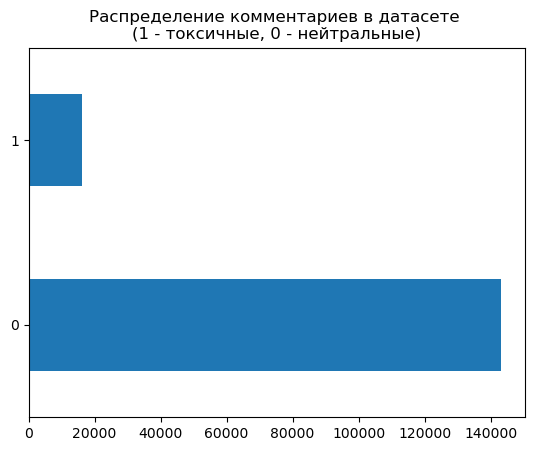

In [34]:
data_raw['toxic'].value_counts().plot(kind='barh')
plt.title('Распределение комментариев в датасете \
\n(1 - токсичные, 0 - нейтральные)')
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 




<div class="alert alert-warning">

Совет: 




- стоило еще проверить на сбалансированность классов в таргете это важная информация при моделировании и  корректной оценки модели. и к нему график можно, ведь красивый, хорошо оформленный график может быть украшением проекта. 


    
- .sample() вместо .head(), ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail)     
   







<div class="alert alert-info">
<b>Комментарий студента</b><br>
Добавил график
</div>

## Готовим признаки

### Лемматизация текста

Скачаем из библиотеки spacy готовый пайплайн из:
 - Токенизатора
 - POS тэггера
 - Лемматизатора

In [5]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

Создадим функцию, которая:
 1) Приводит текст к нижнему регистру, убирает из текса небуквенные символы, единичные буквы
 2) Токенизирует текст
 3) Убирает токены стоп-слов и токены пунктуации
 4) Возвращает леммы слов
 5) Собирает текст в одну строку

In [6]:
def clean_and_lem(text):
    lower = text.lower()
    clear = re.sub('[^a-z]', ' ', lower)
    cleared = re.sub(r'\b\w{1,2}\b', ' ', clear).split()
    sentence = ' '.join(cleared)
    doc = nlp(sentence)
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    res = ' '.join(final_token)
    return res

Проверим работу функции на нескольких текстах

In [10]:
data = data_raw[0:3].copy()
data['text'] = data['text'].apply(clean_and_lem)

for i in range(3):
    print('➖'*50)
    print(data_raw['text'][i])
    print('⬇️⬇️⬇️⬇️⬇️⬇️', end='\n\n')
    print(data['text'][i])

➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
⬇️⬇️⬇️⬇️⬇️⬇️

explanation edit username hardcore metallica fan revert weren vandalism closure gas vote new york dolls fac don remove template talk page retire
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
⬇️⬇️⬇️⬇️⬇️⬇️

aww match background colour seemingly stuck thank talk january utc
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual i

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- WordNetLemmatizer  рабочий вариант, но у него есть особенности, для корректной работы ему нужно передавать не просто слово, но и POS-тег (Part of Speech, части речи). Набираемся ума-разума [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/) )  Обрати внимание на функцию `get_wordnet_pos`. Сразу хочу предупредить, что если делать Лемматизацию правильно, сучетом постегов, то время может занять полчаса-час. Так что не удивляйся (вообще советую сохранить результаты Лематизации в каком-то файлике, чтобы каждый раз не тратить на это много времени)





<div class="alert alert-warning">


Совет: 




- лемматизацию можно было сделать с помощью SpaCy лемматизатором и прямо скажем как инструмент он более удобен и универсален, не нужно заморачиваться с токенизацией и учётом пос тегов




- Чтобы сэкономить время, и убедиться что всё отработало нормально, берёшь парочку предложений, создаёшь dataframe
    
    
    sentence1 = "The striped bats are hanging on their feet for best"
    sentence2 = "you should be ashamed of yourself went worked"
    df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
    print(df_my)


    print(df_my['text'].apply(func))
    
    
    
И тестируешь не нем, должно получиться 
    
    
    
    striped  ------> strip, went -------> go  



Если всё получилось, то можно использовать на всём датасете

<div class="alert alert-info">
<b>Комментарий студента</b><br>
Перешел на SpaCy, теперь лемматизация с учетом POS тегов
</div>

In [ ]:
#тут нужно подождать
data = data_raw.copy()
try:
    # у меня на 6 ядрах(ноут) ~ 1 минута
    pandarallel.initialize(progress_bar=True)
    data['text'] = data['text'].parallel_apply(clean_and_lem)
except:
    # а тут ~ 10 минут 
    tqdm.pandas()
    data['text'] = data['text'].progress_apply(clean_and_lem)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



- Плюс за использование apply, неэффективные циклы нам ни к чему.


- Да, всегда лучше проверить что получилось  в итоге, так всегда будет возможность поправить ошибку

<div class="alert alert-warning">


Совет: 


    
- попробуй .progress_apply, делает что .apply, но еще и показывает на какой итерации находится процесс.  

Для некоторых версий, чтобы заработал .progress_apply предварительно нужно сделать:
    
    
    from tqdm.notebook import tqdm
    tqdm.pandas()
    

И cудя по всему импорты нужно засунуть внутрь функции

То же самое делает .swifter.apply  Предварительно


    !pip install swifter
    import swifter



- если  процесс лемматизации затягивается, можно попробовать [.parallel_apply](https://pypi.org/project/pandarallel/),  кому-то это помогает уменьшить время прогона кода раз в 5-7 (Хотя студенты начинают жаловаться что получается даже медленнее). А у большинства он вообще не запускается ) Предварительно: 

    
    from pandarallel import pandarallel   
    tqdm.pandas(desc="progress")
    pandarallel.initialize(progress_bar = True)





- после очистки и лемматизации (и убрав стопслова) можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах Кроме того графики, рисунки делают проект визуально интересней
    
В тренажере облако импортируем так

    !/opt/conda/bin/python -m pip install wordcloud 


или

    !/opt/conda/bin/python -m pip install wordcloud==1.8.2.2  


И возможно дополнительно надо будет сделать



    !pip install --upgrade Pillow



 
- когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))  


 
    

<div class="alert alert-info">
<b>Комментарий студента</b><br>
Добавил прогрес бар
</div>

### Делим на выборки

Разделим на train/test выборки

In [37]:
train, test = train_test_split(
    data, test_size=0.2, stratify=data['toxic'], random_state=123)
print(train.shape, test.shape)

(127433, 2) (31859, 2)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


- random_state не забываем поставить, иначе каждый новый запуск новый сплит, и новые результаты моделирования




<div class="alert alert-info">
<b>Комментарий студента</b><br>
Исправил
</div>

И разделим признаки и таргет

In [38]:
X_train = train['text']
X_test = test['text']

y_train = train['toxic']
y_test = test['toxic']

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Не забыли о стопсловах, они ни к чему и код побежит быстрей

    
<div class="alert alert-warning">


Совет:     

Вопросик:

А стопслова важней убирать  когда мы используем TF-IDF, или когда используе обычный CountVectorizer? 



<div class="alert alert-info">
<b>Комментарий студента</b><br>
Думаю, важнее убирать, когда используем обычный CountVectorizer. А в случае с TfidfVectorizer убираем их прсто для скорости
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:


- .fit_transform на train датасете, .transform на test/valid. Вроде все верно, но после ты подаешь tf_idf_train в GridSearchCV или cross_val_score и он внутри себя разбивая его на тренировочный и валидационный датасет, получается подглядывание в будущее (утечка данных). Решение в использовании pipeline, ниже распишу


<div class="alert alert-info">
<b>Комментарий студента</b><br>
Исправил
</div>

## Обучение

После TfidfVectorizer мы получили признаки в виде разреженной матрицы(sparse matrix).  
Поэтому, возьмем модели, которые умеют с такой матрицей работать.  
Точность моделей будем проверять кросс-валидацией(3 фолда)

In [40]:
vectorizer = TfidfVectorizer()

### LogisticRegression

In [41]:
model = LogisticRegression(C=13, max_iter=1000, random_state=123)
pipe = make_pipeline(vectorizer, model)
cv = cross_val_score(pipe, X_train, y_train, cv=3, scoring='f1', n_jobs=4)
print('Результат f1: {:.3f}'.format(cv.mean()))

Результат f1: 0.773


In [ ]:
# %%time
# parameters = {'logisticregression__C':np.logspace(-2, 2, 10)}
# gs = GridSearchCV(pipe, parameters, scoring='f1', cv=3, n_jobs=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Не забываем при инициализации модели о random_state, иначе после каждого запуска кода у нас может быть разный результат


И интересно откуда ты взял C=10.  Значение отличные от дефолтных мы находим, а не просто вставляя откуда-то


<div class="alert alert-info">
<b>Комментарий студента</b><br>
 - Добавил random_state<br>
 - Добавил перебор гиперпараметров<br>
 - Упаковал все в пайплайн
</div>

### LinearSVC

In [42]:
model = LinearSVC(random_state=123)
pipe = make_pipeline(vectorizer, model)
cv = cross_val_score(pipe, X_train, y_train, cv=3, scoring='f1', n_jobs=4)
print('Результат f1: {:.3f}'.format(cv.mean()))

Результат f1: 0.777


In [ ]:
# %%time
# parameters = {'linearsvc__C':np.logspace(-1, 1, 10)}
# gs = GridSearchCV(pipe, parameters, scoring='f1', cv=3, n_jobs=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

### ComplementNB

In [43]:
model = ComplementNB(alpha=0.2)
pipe = make_pipeline(vectorizer, model)
cv = cross_val_score(pipe, X_train, y_train, cv=3, scoring='f1', n_jobs=4)
print('Результат f1: {:.3f}'.format(cv.mean()))

Результат f1: 0.671


In [ ]:
# %%time
# parameters = {'complementnb__alpha':np.logspace(-2, 1, 10)}
# gs = GridSearchCV(pipe, parameters, scoring='f1', cv=3, n_jobs=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка:    




    
Всё-таки стоит поперебирать гиперпараметры
    
Есть два варианта исправить красное:
    
    
1. Подобрать лучшие гиперпараметры в вручную написанном цикле 
    
    
2.  Можно вместо цикла использовать sklearn-ий встроенный функционал GridSearch. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_, данные обучения положит в cv_restult_. А главное  он сделает несколько разбиений на train / validation выборки (кросс-валидация), тем самым поборется с рандомом, когда на валидации получен хороший результат только изза удачного сплита. 

А еще лучше использовать связку GridSearchCV + pipeline. 

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), это тема которая сразу затрагивает кроссвалидацию, тюнинг "векторайз", подбор гиперпараметров модели и о том что код стоит делать компактным.
    
    
- в TfidfVectorizer(stop_words=stopwords) у тебя по умолчанию ngram_range=(1, 1), тут можно подбирать разное число n- грамм (и другие параметры), максимизируя метрику, но как объединить перебор по ngram_range с обучением моделей, чтобы не делать это по отдельности или с использованием цикла?! pipeline! Готовый [пример для работы с текстами](https://medium.com/@yoni.levine/how-to-grid-search-with-a-pipeline-93147835d916). Всё что нужно там есть, хотя очень лаконично. Можешь погуглить по:


    
    pipeline nlp gridsearchcv
    
    
- как избежать ошибки подглядывания в будущее, когда мы предварительно работаем с данными (шкалирование, нормализация, TfidfVectorizer итп итд)? pipeline! особенно это важно, когда мы используем кроссвалидацию. Для TfidfVectorizer делаеь .fit (обучаемся) на train, а transform на test, точно также нужно сделать для валидационной выборки. Но GS делает валидационные внутри себя, спрашивается как добраться до них и избежать подглядывания в будущее? Казалось бы никак, но нет! Pipeline! ) 
    
    
- pipeline позволяет делать наш код компактней и читабельней, это большой плюс, когда код будет раздуваться   



В общем если сделать GS+pieline будет вообще хорошо )  
    
    
    
и только затем, выбрав лучшую модель (с лучшими значениями гиперпараметров) проведем тестирование на датасете о котором наша модель не имеет никакого представления. И если окажется что тестовая метрика (нашей лучшей на валидации модели) не удовлетворяет критериям качества, то мы начнем процесс моделирования с начала (а не будем пробовать другие модели которые были хуже на валидации - по приниципу "а вдруг другая модель подойдет").    
    
    


</div>


<div class="alert alert-info">
<b>Комментарий студента</b><br>
Упаковал кросс-валидацию и перебор гиперпараметров в пайплайн
</div>

---
По итогам лучший результат на тренировочной выборке показала модель LinearSVC

## Тестирование

Узнаем результат на тестовой выборке

In [60]:
model = LinearSVC(random_state=123)
pipe = make_pipeline(vectorizer, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Результат f1: {:.3f}'.format(f1_score(y_test, y_pred)))

Результат f1: 0.786


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 

- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации, или парочку лучших, если на валидации результаты близки




- Если студент получил на тесте f1 выше 0,75, это считается приемлемым результатом.


<div class="alert alert-warning">



Совет: 


Что может помочь добиться лучшего результата (от простого)? 




- можно поиграться [порогом](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/). Таким образом можно поднять метрику на процент - полтора
   
    
    
    
    
- подобрать лучшие гиперпараметры с использованием кроссвалидации (тут пригодится GridSearchCV) 
    


    
 - полезно настраивать векторайзеры  (тут пригодится pipeline). Это конечно потребует вычислительных мощностей, ведь если даже использовать биграммы число признаков резко увеличится


     

- сгенерировать новые фичи, например  например посчитать число слов в тексте, длину слов итп итд. Или с помощью [тематического моделирования](https://pythobyte.com/python-for-nlp-topic-modeling-8fb3d689/) 
    
    
    





- использование предбученной модели Берта, выбрав соответствующую модель и используя полученные эмбединги, даже на небольшом тренировочном датасете можно обучить модель, которая на test покажет хорошую метрику. В этом случаи можно сразу получить метрику > 0.95 (при правильно выбранной модели)




А ещё можешь посмотреть какие слова  является наиболее важным для классификации с точки зрения модели. Получаем список слов    
    
    
    
    .get_feature_names_out().tolist()
    
    
    
Получаем коэффициенты важности (для логистическая регрессии)    
    
    .coef_.tolist()[0]



## Выводы

Для задачи классификации комментариев на негативные и позитивные были обучены и протестированы несколько моделей.  
Обучались модели на размеченных комментариях, переведенных в матрицу векторов *TF-IDF*(оценки важности слова в контексте документа).  

Наилучший результат на тестовой выборке показала модель **LinearSVC** с **F1 = 0.786** (требуемый результат >0.75)


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Александр, у тебя старательно выполненная работа, все четко, осмысленно. 




Логика моделирования не нарушена
    
    
Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить).
    



Обязательное к исправлению:






- WordNetLemmatizer используем с POS - тег 


- при инициализации модели и сплите не забываем random_state (можно один раз вначале просто прописать random.seed(42), чтобы не прописывать каждый раз везде random_state. Кстати знаешь откуда 42?)







- нет перебора гиперпараметров (это можно сделать с помощью вручную прописанных циклов либо с помощью GridSearchCV)




Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1


<div class="alert alert-info">
<b>Комментарий студента</b><br>
Спасибо большое за подробное ревью и отдельное спасибо за полезные ссылки на материал!👀
</div>